Solving the [2023 Week 2 Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md)

# Section 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
housing_df = pd.read_csv('data/housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


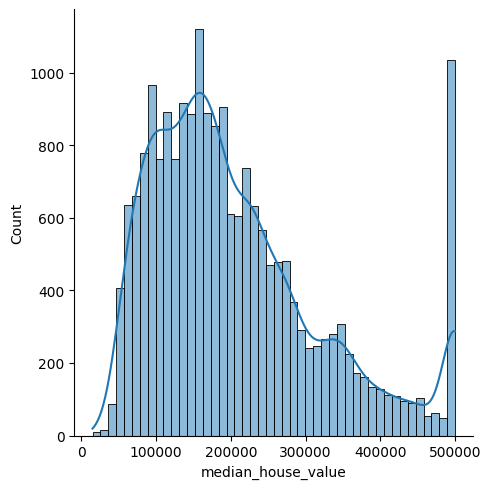

In [4]:
sns.displot(data=housing_df, x='median_house_value', kde=True);

## Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [5]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
ocean_proximity_filter = (housing_df['ocean_proximity']=='<1H OCEAN') | (housing_df['ocean_proximity']=='INLAND')
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

data = housing_df[ocean_proximity_filter].loc[:, columns].reset_index(drop=True)

data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Section 2


## Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


**Answer**: `total_bedrooms`

## Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [8]:
np.median(data['population'])

1195.0

**Answer**: 1195

# Section 3

## Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [9]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [10]:
n_train, n_val, n_test, n_train+n_val+n_test

(9413, 3137, 3137, 15687)

In [11]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
 8   median_house_value  9413 non-null   float64
dtypes: float64(9)
memory usage: 662.0 KB


In [13]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [14]:
len(y_train)

9413

In [15]:
def prepend_ones(X: np.ndarray) -> np.ndarray:
    """
    Returns a matrix with a column of 1's prepended to it as the first column.
    """
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


In [16]:
def train_linear_regression(X: np.ndarray, 
                      y: np.ndarray, 
                      r: int=None) -> np.ndarray:
    """
    Returns weights for a linear regression model trained using X and y.
    Optional parameter r for regularization.
    """

    # print(type(X), "\n\n", type(y))
    # prepend column of 1 to X
    X = prepend_ones(X)
    
    XTX = X.T.dot(X)
    # print(XTX)
    if r:
        XTX += np.eye(XTX.shape[0]) * r
        # print(XTX)
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
            
    return w


In [17]:
def predict_linear_regression(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    """
    Returns predictions for a given house X, 
    using trained weights w.
    """
    
    X = prepend_ones(X)
    
    return X.dot(w) #.reshape(-1,)  # returns a one-dimensional array


In [18]:
def rmse(y_pred: np.ndarray, y_true: np.ndarray) -> np.float64:
    """
    Returns the root mean square error (rmse)
    using predicted values of the target variable (y_pred) 
    and actual values of the target variable (y_true).
    """

    rmse = np.sqrt((np.square(y_pred - y_true)).mean())
    return rmse


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [19]:
df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [20]:
df_fill_0 = df_train.fillna(0)
df_fill_0.total_bedrooms.isnull().sum()

0

In [21]:
w_0 = train_linear_regression(df_fill_0.values, y_train)
y_0 = predict_linear_regression(df_val.fillna(0), w_0)
score_0 = round(rmse(y_0, y_val), 2)
score_0

0.34

In [22]:
mean_bedrooms = df_train.total_bedrooms.mean()
mean_bedrooms

542.552956325786

In [23]:
df_fill_mean = df_train.fillna(mean_bedrooms)

w_mean = train_linear_regression(df_fill_mean, y_train)
y_mean = predict_linear_regression(df_val.fillna(mean_bedrooms), w_mean)
score_mean = round(rmse(y_mean, y_val), 2)
score_mean

0.34

**Answer**: Both are equally good

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

In [24]:
r_options = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scores = []

for r in r_options:
    w_ = train_linear_regression(df_train.fillna(0), y_train, r)
    y_ = predict_linear_regression(df_val.fillna(0), w_)
    score_ = rmse(y_, y_val)
    scores.append(round(score_, 2))


In [25]:
dict(zip(r_options, scores))

{0: 0.34,
 1e-06: 0.34,
 0.0001: 0.34,
 0.001: 0.34,
 0.01: 0.34,
 0.1: 0.34,
 1: 0.34,
 5: 0.35,
 10: 0.35}

**Answer**: 0

## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [26]:
def evaluation_pipeline(data: pd.core.frame.DataFrame, 
                        **kwargs) -> np.float64:
    """
    Returns RMSE for the passed parameters.
    Requires the complete dataframe as an input.
    Accepts hyperparameters as named parameters.
    """
    if kwargs:
        seed=kwargs['seed'] if 'seed' in kwargs.keys() else 42
        r=kwargs['r'] if 'r' in kwargs.keys() else 0
        test=kwargs['test'] if 'test' in kwargs.keys() else False
        
    else:
        seed=42; r=0; test=False

    # print(f"Training and Evaluating with seed={seed}, " +
    #      f"r={r}, and test={test}.\n" +
    #      f"If test=True, training the final model.")


    len_data = len(data)
    n_val = int(len_data * 0.2)
    n_test = int(len_data * 0.2)
    n_train = len(data) - n_val - n_test
    
    # creates shuffled index
    idx = np.arange(len_data)
    
    np.random.seed(seed)
    np.random.shuffle(idx)

    
    # splits df for validation / testing
    # while testing, the model is trained on the first n_train + n_val records
    # and validated against the remaining records
    if test:        
        train_df = data.iloc[idx[:n_train+n_val], :]
        _ = data.iloc[idx[n_train: n_train+n_val], :]
        val_df = data.iloc[idx[n_train+n_val:], :]

    # while validating, the model is trained on the first n_train records
    # and validated against the next n_val records
    else:        
        train_df = data.iloc[idx[:n_train], :]
        val_df = data.iloc[idx[n_train: n_train+n_val], :]
        _ = data.iloc[idx[n_train+n_val:], :]
        
    X_train = train_df.reset_index(drop=True)
    y_train = train_df.median_house_value.values
    del X_train['median_house_value']
    
    X_val = val_df.reset_index(drop=True)
    y_val = val_df.median_house_value.values
    del X_val['median_house_value']

    
    # transforms y
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
 
    
    # trains model weight
    w = train_linear_regression(X_train.fillna(0), y_train, r=r)

    
    # predicts using trained weights
    y = predict_linear_regression(X_val.fillna(0), w)

    
    # calculates rmse
    score = rmse(y, y_val)
    # print(f"seed={seed}, r={r}, test={test}, rmse={score}\n")

    
    return score

In [27]:
default_score = evaluation_pipeline(data)
round(default_score, 2)

0.34

In [28]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    score = evaluation_pipeline(data, seed=seed)
    scores.append(score)


In [29]:
dict(zip(seeds, scores))

{0: 0.3377387160040314,
 1: 0.33779993536620007,
 2: 0.33842870067641523,
 3: 0.3320049468308779,
 4: 0.33944518625554937,
 5: 0.3433819705295176,
 6: 0.3385330211766526,
 7: 0.346874769730657,
 8: 0.3512736865960569,
 9: 0.33415582665199606}

In [30]:
round(np.std(scores), 3)

0.005

**Answer**: 0.005

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [31]:
test_score = evaluation_pipeline(data, seed=9, r=0.001, test=True)
round(test_score, 2)

0.33

**Answer**: 0.33